Import necessary libraries

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn import set_config
from sklearn.impute import SimpleImputer
set_config(display='diagram')

Load the data

In [ ]:
#Load the data
df =pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Exploring the Data

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Check for Duplicated, Missing, or Erroneous Data

In [ ]:
# Check to see if there are any duplicates
df.duplicated().sum()

0

There are no duplicates

Identify missing values

In [ ]:
#Identify missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#Correcting categories
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat',
                                                         'reg':'Regular',
                                                         'LF': 'Low Fat'})

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Dropping unused colums
df = df.drop(columns=['Item_Identifier','Outlet_Identifier', 'Outlet_Establishment_Year'])

In [ ]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

In [ ]:
# split X and y, you are predicting price
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Instantiate column selectors

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

Instantiate transformers

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Create your preprocessing steps
# One-hot encode the categorical variables
# remember to set sparse=False for the OneHotEncoder




ohe_tuple = (ohe, cat_selector)

# let the numeric columns pass through unchanged
preprocessor = make_column_transformer(ohe_tuple, remainder = 'passthrough')

Instantiate pipelines

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

Instantiate column transfomer

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder= 'passthrough')
preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f33cf4aba90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f33ab9ea390>)])

Tranformer Data

In [ ]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f33cf4aba90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f33ab9ea390>)])

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Inspect the result

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 31)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
#Transform Array Data Into Dataframe
X_train_processed_df = pd.DataFrame(X_train_processed)
X_train_processed_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.817249,-0.712775,1.828109,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.556340,-1.291052,0.603369,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.131512,1.813319,0.244541,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.169219,-1.004931,-0.952591,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.528819,-0.965484,-0.336460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,-0.832409,4.309657,-0.044657,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,0.639356,1.008625,-1.058907,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6389,1.113736,-0.920527,1.523027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,1.766009,-0.227755,-0.383777,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


1) Your first task is to build a linear regression model to predict sales.

Build a linear regression model.

Evaluate the performance of your model based on r^2.

Evaluate the performance of your model based on rmse.

In [ ]:
# Additionl imports 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
reg = LinearRegression()
reg_pipe = make_pipeline(preprocessor, reg)

reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f33cf4aba90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f33ab9ea390>)])),
                ('linearregression', LinearRegression())])

Measuring model performance - using functions from metrics

In [ ]:
## Measuring model performance - using builtin .score()
print(f"Train R-Squared: { round( reg_pipe.score(X_train, y_train),3) }")
print(f"Test R-Squared: { round( reg_pipe.score(X_test, y_test),3) }")

Train R-Squared: 0.561
Test R-Squared: 0.566


Measuring model performance - using functions from metrics

In [ ]:
# get predictions for train and test data
y_hat_train = reg_pipe.predict(X_train)
y_hat_test = reg_pipe.predict(X_test)

In [ ]:
## Get r-square for train vs test 
print(f"Train R2 score: { round( r2_score(y_train, y_hat_train), 3)}")
print(f"Test R2 score: { round( r2_score(y_test, y_hat_test), 3)}")

Train R2 score: 0.561
Test R2 score: 0.566


In [ ]:
## Get RMSE for train vs test
rmse_train =  mean_squared_error(y_train, y_hat_train, squared=False)
rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)
print(f"Train RMSE: { round(rmse_train, 2)}")
print(f"Test RMSE: { round( rmse_test, 2)}")

Train RMSE: 1140.32
Test RMSE: 1094.76


2) Your second task is to build a regression tree model to predict sales.

Build a simple regression tree model.

Compare the performance of your model based on r^2.

Compare the performance of your model based on rmse.

In [ ]:
# Create a function to take the true and predicted labels and print MAE, MSE, RMSE, and R2 metrics
def evaluate_regression(y_true, y_pred):
  """Takes true target and predicted target and prints MAE, MSE, RMSE and R2"""
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'scores: \nMAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

Baseline Model

In [ ]:
# instantiate a model.  What should the depth be to get the highest bias?
# remember, a simpler model createst a higher bias.  What does a simple tree look like?
dec_tree = DecisionTreeRegressor(max_depth=1)
# put the model in a pipeline with the preprocessor
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# fit the model on the training data
dec_tree_pipe.fit(X_train, y_train)
# evaluate the model on both the training and the testing data.
print('Training')
evaluate_regression(y_train, dec_tree_pipe.predict(X_train))
print('Testing')
evaluate_regression(y_test, dec_tree_pipe.predict(X_test))

Training
scores: 
MAE: 1,138.53 
MSE: 2,255,705.55 
RMSE: 1,501.90 
R2: 0.24
Testing
scores: 
MAE: 1,112.15 
MSE: 2,125,288.24 
RMSE: 1,457.84 
R2: 0.23


[Text(0.5, 0.75, 'X[2] <= 0.025\nsquared_error = 2959455.705\nsamples = 6392\nvalue = 2209.979'),
 Text(0.25, 0.25, 'squared_error = 967180.653\nsamples = 3170\nvalue = 1364.229'),
 Text(0.75, 0.25, 'squared_error = 3523434.879\nsamples = 3222\nvalue = 3042.08')]

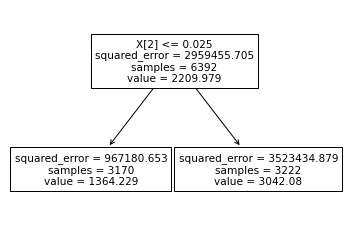

In [ ]:
# plot the simple tree
plot_tree(dec_tree)

In [ ]:
# instantiate a model.  What should the depth be to get the highest variance?
# remember, a more complex model createst a higher bias.  
# what does a complex tree look like?
dec_tree_var = DecisionTreeRegressor(max_depth=None)
# put the model in a pipeline with the preprocessor
var_tree_pipe = make_pipeline(preprocessor, dec_tree_var)
# fit the model on the training data
var_tree_pipe.fit(X_train, y_train)
# evaluate the model on both the training and the testing data.
print('Train Data')
evaluate_regression(y_train, var_tree_pipe.predict(X_train))
print('\nTest Data')
evaluate_regression(y_test, var_tree_pipe.predict(X_test))

Train Data
scores: 
MAE: 0.00 
MSE: 0.00 
RMSE: 0.00 
R2: 1.00

Test Data
scores: 
MAE: 1,075.49 
MSE: 2,457,206.74 
RMSE: 1,567.55 
R2: 0.11


In [ ]:
var_tree_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f33cf4aba90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f33ab9ea390>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
# get depth of the tree from the pipeline
var_tree_pipe['decisiontreeregressor'].get_depth()

42

In [ ]:
# get the depth of the tree directly
dec_tree_var.get_depth()

42

Balance

In [ ]:
# create a range of max_depth values to loop over
depths = range(1, 10)
# create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train','Test'], index=depths)
# loop over the values in the depths range 
for depth in depths:
  # fit a new model with the depth
  dec = DecisionTreeRegressor(max_depth=depth)
  # put model in a pipeline
  dec_pipe = make_pipeline(preprocessor, dec)
  # fit the model
  dec_pipe.fit(X_train, y_train)
  # create prediction arrays
  train_pred = dec_pipe.predict(X_train)
  test_pred = dec_pipe.predict(X_test)

  # evaluate the model using R2 score
  train_r2 = r2_score(y_train, train_pred)
  test_r2 = r2_score(y_test, test_pred)
  # store the scores in a dataframe
  scores.loc[depth, 'Train'] = train_r2
  scores.loc[depth, 'Test'] = test_r2

In [ ]:
# print scores
scores


,Train,Test
1,0.237797,0.229683
2,0.431641,0.433778
3,0.524218,0.524222
4,0.582625,0.584005
5,0.60394,0.59471
6,0.615072,0.582356
7,0.626453,0.578569
8,0.642724,0.564438
9,0.663609,0.552689


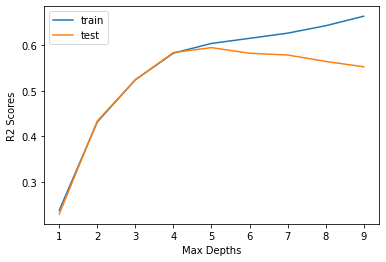

In [ ]:
#plot the scores to visually determine the best max_depth
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend()
plt.show()

In [ ]:
# sort the dataframe by test scores and save the index (k) of the best score
scores.sort_values(by='Test', ascending=False)


,Train,Test
5,0.60394,0.59471
4,0.582625,0.584005
6,0.615072,0.582356
7,0.626453,0.578569
8,0.642724,0.564438
9,0.663609,0.552689
3,0.524218,0.524222
2,0.431641,0.433778
1,0.237797,0.229683


In [ ]:
# print the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

5

Fit and Evaluate the best decision tree

In [ ]:
# Create and evaluate a new model with the best depth from the loop above
bestdec = DecisionTreeRegressor(max_depth=best_depth)


bestdec_pipe = make_pipeline(preprocessor, bestdec)
  # fit the model
bestdec_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f33cf4aba90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f33ab9ea390>)])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=5))])

In [ ]:
print('Train')
evaluate_regression(y_train, bestdec_pipe.predict(X_train))
print('\nTest')
evaluate_regression(y_test, bestdec_pipe.predict(X_test))

Train
scores: 
MAE: 762.61 
MSE: 1,172,122.77 
RMSE: 1,082.65 
R2: 0.60

Test
scores: 
MAE: 738.32 
MSE: 1,118,185.97 
RMSE: 1,057.44 
R2: 0.59
